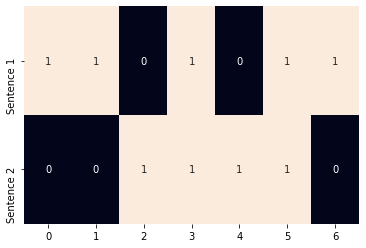

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
corpus = ['Time flies flies like an arrow.',
            'Fruit flies like a banana.']

one_hot_vectorizer = CountVectorizer(binary=True)

one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(one_hot, annot=True, cbar=False, yticklabels= ['Sentence 1', 'Sentence 2'])

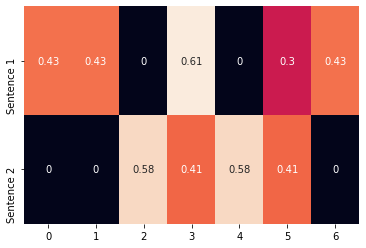

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(tfidf, annot=True, cbar=False, yticklabels= ['Sentence 1', 'Sentence 2'])

Creating tensors

Operations with tensors

Indexing, slicing, and joining with tensors

Computing gradients with tensors

Using CUDA tensors with GPUs

# create tensor

In [17]:
def describe(x):
    print("Type: {}".format(x.type()))
    print("Shape. size: {}".format(x.shape))
    print("Value: {}".format(x))

In [18]:
import torch

In [22]:
describe(torch.tensor(2))
describe(torch.tensor([2,3]))
describe(torch.tensor([[2],[3]]))

Type: torch.LongTensor
Shape. size: torch.Size([])
Value: 2
Type: torch.LongTensor
Shape. size: torch.Size([2])
Value: tensor([2, 3])
Type: torch.LongTensor
Shape. size: torch.Size([2, 1])
Value: tensor([[2],
        [3]])


In [23]:
describe(torch.rand(2, 3)) # uniform random
describe(torch.randn(2, 3)) # random normal

Type: torch.FloatTensor
Shape. size: torch.Size([2, 3])
Value: tensor([[0.8244, 0.4180, 0.2062],
        [0.4391, 0.7284, 0.8988]])
Type: torch.FloatTensor
Shape. size: torch.Size([2, 3])
Value: tensor([[ 0.0858, -0.1159, -0.2562],
        [ 0.2849,  1.6316, -0.0132]])


In [24]:
describe(torch.zeros(2, 3))
x = torch.ones(2, 3)
describe(x)
x.fill_(5)
describe(x)

Type: torch.FloatTensor
Shape. size: torch.Size([2, 3])
Value: tensor([[0., 0., 0.],
        [0., 0., 0.]])
Type: torch.FloatTensor
Shape. size: torch.Size([2, 3])
Value: tensor([[1., 1., 1.],
        [1., 1., 1.]])
Type: torch.FloatTensor
Shape. size: torch.Size([2, 3])
Value: tensor([[5., 5., 5.],
        [5., 5., 5.]])


In [27]:
x = torch.Tensor([[[1, 2, 3],
[4, 5, 6],[1,1,1]]])
describe(x)

Type: torch.FloatTensor
Shape. size: torch.Size([1, 3, 3])
Value: tensor([[[1., 2., 3.],
         [4., 5., 6.],
         [1., 1., 1.]]])


# Tensor Operations

In [29]:
x = torch.randn(2, 3)
describe(x)
describe(torch.add(x, x))
describe(x + x)

Type: torch.FloatTensor
Shape. size: torch.Size([2, 3])
Value: tensor([[ 1.4062,  0.5718, -1.6457],
        [-0.0991, -1.1543,  1.7209]])
Type: torch.FloatTensor
Shape. size: torch.Size([2, 3])
Value: tensor([[ 2.8124,  1.1436, -3.2914],
        [-0.1982, -2.3086,  3.4418]])
Type: torch.FloatTensor
Shape. size: torch.Size([2, 3])
Value: tensor([[ 2.8124,  1.1436, -3.2914],
        [-0.1982, -2.3086,  3.4418]])


In [31]:
x = torch.arange(6)
describe(x)
x = x.view(2, 3)
describe(x)
describe(torch.sum(x, dim=0))  #   列相加
describe(torch.sum(x, dim=1))  #  行相加

Type: torch.LongTensor
Shape. size: torch.Size([6])
Value: tensor([0, 1, 2, 3, 4, 5])
Type: torch.LongTensor
Shape. size: torch.Size([2, 3])
Value: tensor([[0, 1, 2],
        [3, 4, 5]])
Type: torch.LongTensor
Shape. size: torch.Size([3])
Value: tensor([3, 5, 7])
Type: torch.LongTensor
Shape. size: torch.Size([2])
Value: tensor([ 3, 12])


In [32]:
describe(torch.transpose(x, 0, 1))  # (2,3) ->(3,2), 0列，1行

Type: torch.LongTensor
Shape. size: torch.Size([3, 2])
Value: tensor([[0, 3],
        [1, 4],
        [2, 5]])


# Tensors and Computational Graphs

In [34]:
x = torch.ones(2, 2, requires_grad=True)
describe(x)
print(x.grad is None)

Type: torch.FloatTensor
Shape. size: torch.Size([2, 2])
Value: tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
True


In [35]:
y = (x + 2) * (x + 5) + 3
describe(y)
print(x.grad is None)

Type: torch.FloatTensor
Shape. size: torch.Size([2, 2])
Value: tensor([[21., 21.],
        [21., 21.]], grad_fn=<AddBackward0>)
True


In [36]:
z = y.mean()
describe(z)
z.backward()
print(x.grad is None)

Type: torch.FloatTensor
Shape. size: torch.Size([])
Value: 21.0
False


In [37]:
print (torch.cuda.is_available())

True


In [38]:
# preferred method: device agnostic tensor instantiation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print (device)

cuda


In [39]:
x = torch.rand(3, 3).to(device)
describe(x)

Type: torch.cuda.FloatTensor
Shape. size: torch.Size([3, 3])
Value: tensor([[0.8965, 0.3876, 0.0764],
        [0.0692, 0.3750, 0.0522],
        [0.5643, 0.1047, 0.1685]], device='cuda:0')


In [40]:
y = torch.rand(3, 3)
x + y

RuntimeError: expected device cuda:0 but got device cpu

In [41]:
cpu_device = torch.device("cpu")
y = y.to(cpu_device)
x = x.to(cpu_device)
x + y

tensor([[0.9757, 0.7779, 0.8416],
        [1.0465, 1.2548, 0.5157],
        [1.2969, 0.1641, 0.3755]])